# Compiles all Sources of COP vs. Outdoor Temperature and Plots them

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from IPython.display import display

# import matplotlib pyplot commands
from matplotlib.pyplot import *
 
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

In [2]:
rcParams['figure.figsize']= (10, 7)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

In [3]:
# File names of the pickled DataFrames containing the data
files = (
    #'temp_cop_manuf_max.pkl',
    'temp_cop_manuf_varying.pkl',
    #'../field_studies/kaluza/temp_cop_kaluza.pkl',
    '../field_studies/kaluza/temp_cop_kaluza_remote.pkl',
    '../field_studies/cchrc_2015/temp_cop_cchrc_dillingham.pkl',
    '../field_studies/cchrc_2015/temp_cop_cchrc_wrangell.pkl',
    '../field_studies/cadmus_vt/temp_cop_cadmus_vt.pkl',
    #'../field_studies/harley/temp_cop_harley.pkl',
    '../field_studies/ba_2015/temp_cop_swinter.pkl',
)
df = None
for fn_pkl in files:
    if df is None:
        df = pd.read_pickle(fn_pkl)
    else:
        df = pd.concat([df, pd.read_pickle(fn_pkl)], sort=False)
df

,temperature,cop,source,field_study,hspf
0.0,5.000000,2.276667,"Manuf Spec, Varying Load",False,NaN
1.0,17.000000,2.609744,"Manuf Spec, Varying Load",False,NaN
2.0,47.000000,5.481243,"Manuf Spec, Varying Load",False,NaN
3.0,10.982256,2.240202,"Seward, Kaluza w/ Remote Therm",True,13.40
4.0,13.280402,2.178560,"Seward, Kaluza w/ Remote Therm",True,13.40
5.0,16.581523,2.287307,"Seward, Kaluza w/ Remote Therm",True,13.40
6.0,19.299710,2.491674,"Seward, Kaluza w/ Remote Therm",True,13.40
7.0,22.281210,2.560221,"Seward, Kaluza w/ Remote Therm",True,13.40
8.0,25.728195,2.751083,"Seward, Kaluza w/ Remote Therm",True,13.40
9.0,28.091171,2.716664,"Seward, Kaluza w/ Remote Therm",True,13.40


In [4]:
# define the theme by returning the dictionary of configurations
def larger():
    return {
        'config': {
            'view': {
                'height': 350,
                'width': 525,
            },
            'axis': {
                'labelFontSize': 14, 
                'titleFontSize': 16
            },
            'legend': {
                'labelFontSize': 12, 
                'titleFontSize': 14
            },
        }
    }

# register the custom theme under a chosen name
alt.themes.register('larger', larger)

# enable the newly registered theme
alt.themes.enable('larger')

ThemeRegistry.enable('larger')

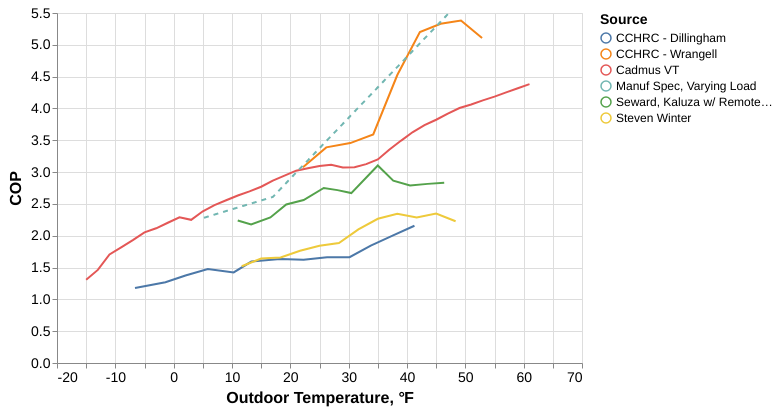

In [5]:
line1 = alt.Chart(df.query('field_study == True')).mark_line().encode(
    x = 'temperature',
    y = 'cop',
    color = 'source:N',
    #opacity = 'Selected:N',
)
line2 = alt.Chart(df.query('field_study == False')).mark_line(strokeDash=[5,5]).encode(
    x = alt.X('temperature', axis=alt.Axis(title='Outdoor Temperature, ℉')),
    y = alt.Y('cop', axis=alt.Axis(title='COP')),
    color = alt.Color('source:N', legend=alt.Legend(title="Source")),
    #opacity = 'Selected:N',
)
line1 + line2

In [6]:
# Create a table of COPs from field studies averaged by
# outdoor temperature bin.

# first just get the field studies
dff = df.query('field_study == True').copy()
bin_width = 4.0     # degrees F

# Now calculate the outdoor temperature bin for each row.
dff['temp_bin'] = dff['temperature'] // bin_width
dff.head()

,temperature,cop,source,field_study,hspf,temp_bin
3.0,10.982256,2.240202,"Seward, Kaluza w/ Remote Therm",True,13.4,2.0
4.0,13.280402,2.178560,"Seward, Kaluza w/ Remote Therm",True,13.4,3.0
5.0,16.581523,2.287307,"Seward, Kaluza w/ Remote Therm",True,13.4,4.0
6.0,19.299710,2.491674,"Seward, Kaluza w/ Remote Therm",True,13.4,4.0
7.0,22.281210,2.560221,"Seward, Kaluza w/ Remote Therm",True,13.4,5.0


In [7]:
# Need to create an average COP and an average Outdoor Temperature
# by bin.  First the COP table
df_cop_bin = pd.pivot_table(dff, values='cop', index='temp_bin', columns='source')
df_cop_bin

source,CCHRC - Dillingham,CCHRC - Wrangell,Cadmus VT,"Seward, Kaluza w/ Remote Therm",Steven Winter
temp_bin,,,,,
-4.0,NaN,NaN,1.385073,NaN,NaN
-3.0,NaN,NaN,1.761754,NaN,NaN
-2.0,1.177788,NaN,1.991132,NaN,NaN
-1.0,1.268600,NaN,2.160447,NaN,NaN
0.0,1.376003,NaN,2.269338,NaN,NaN
1.0,1.475082,NaN,2.432189,NaN,NaN
2.0,1.423151,NaN,2.594815,2.240202,1.520717
3.0,1.594087,NaN,2.733524,2.178560,1.642179
4.0,1.633112,NaN,2.905003,2.389490,1.656879


In [8]:
# Now the same DataFrame structure but average the outdoor temperature
df_temp_bin = pd.pivot_table(dff, values='temperature', index='temp_bin', columns='source')
df_temp_bin

source,CCHRC - Dillingham,CCHRC - Wrangell,Cadmus VT,"Seward, Kaluza w/ Remote Therm",Steven Winter
temp_bin,,,,,
-4.0,NaN,NaN,-14.0,NaN,NaN
-3.0,NaN,NaN,-10.0,NaN,NaN
-2.0,-6.628883,NaN,-6.0,NaN,NaN
-1.0,-1.408751,NaN,-2.0,NaN,NaN
0.0,2.026514,NaN,2.0,NaN,NaN
1.0,5.858913,NaN,6.0,NaN,NaN
2.0,10.286588,NaN,10.0,10.982256,11.666667
3.0,13.319837,NaN,14.0,13.280402,15.000000
4.0,18.238119,NaN,18.0,17.940617,18.333333


In [9]:
# Assign averaging weights to each of the studies.
# The weights are a judgement call based on the number of the heat pumps in each
# study and on data quality.
weights = (1.0, 0.5, 3.0, 1.0, 3.0)
study_weights = dict(zip(df_cop_bin.columns, weights))
study_weights

{'CCHRC - Dillingham': 1.0,
 'CCHRC - Wrangell': 0.5,
 'Cadmus VT': 3.0,
 'Seward, Kaluza w/ Remote Therm': 1.0,
 'Steven Winter': 3.0}

The general plan is to first create a COP vs. Temperature segment for the 
temperature range where all of the studies overlap.  Then move to the colder
and warmer regions to create line segments where some of the studies overlap;
those segments will be shifted up or down to sensibly meet up with the main
segment (which has data from all studies).

In [10]:
# determine the weighted average of the columns in a DataFrame,
# dropping the rows where one of the values is not present
def weighted_avg(df_in):
    wt_total = 0.0
    ser_cop = None
    for col in df_in.columns:
        if ser_cop is None:
            ser_cop = df_in[col] * study_weights[col]
        else:
            ser_cop += study_weights[col] * df_in[col]
        wt_total += study_weights[col]
    ser_cop /= wt_total
    ser_cop.name = 'weighted average'
    return ser_cop.dropna()

In [11]:
ser_cop1 = weighted_avg(df_cop_bin)
ser_temp1 = weighted_avg(df_temp_bin)
df_seg1 = pd.DataFrame({'temp': ser_temp1, 'cop': ser_cop1}, index=ser_cop1.index)
df_seg1

,temp,cop
temp_bin,,
5.0,21.957386,2.368981
6.0,25.659065,2.464191
7.0,29.947986,2.504418
8.0,34.458042,2.709271
9.0,38.051262,2.875762
10.0,41.813684,2.996541


In [12]:
df_cop_bin.drop(df_seg1.index)

source,CCHRC - Dillingham,CCHRC - Wrangell,Cadmus VT,"Seward, Kaluza w/ Remote Therm",Steven Winter
temp_bin,,,,,
-4.0,NaN,NaN,1.385073,NaN,NaN
-3.0,NaN,NaN,1.761754,NaN,NaN
-2.0,1.177788,NaN,1.991132,NaN,NaN
-1.0,1.268600,NaN,2.160447,NaN,NaN
0.0,1.376003,NaN,2.269338,NaN,NaN
1.0,1.475082,NaN,2.432189,NaN,NaN
2.0,1.423151,NaN,2.594815,2.240202,1.520717
3.0,1.594087,NaN,2.733524,2.178560,1.642179
4.0,1.633112,NaN,2.905003,2.389490,1.656879


In [13]:
# work on the next colder segment, which would be temp_bin indices 2.0 through 4.0
df_cop2 = df_cop_bin.loc[[2.0, 3.0, 4.0], :].dropna(axis=1)
df_temp2 = df_temp_bin.loc[[2.0, 3.0, 4.0], :].dropna(axis=1)
display(df_cop2)
display(df_temp2)

source,CCHRC - Dillingham,Cadmus VT,"Seward, Kaluza w/ Remote Therm",Steven Winter
temp_bin,,,,
2.0,1.423151,2.594815,2.240202,1.520717
3.0,1.594087,2.733524,2.178560,1.642179
4.0,1.633112,2.905003,2.389490,1.656879


source,CCHRC - Dillingham,Cadmus VT,"Seward, Kaluza w/ Remote Therm",Steven Winter
temp_bin,,,,
2.0,10.286588,10.0,10.982256,11.666667
3.0,13.319837,14.0,13.280402,15.000000
4.0,18.238119,18.0,17.940617,18.333333


In [14]:
ser_cop2 = weighted_avg(df_cop2)
ser_temp2 = weighted_avg(df_temp2)
df_seg2 = pd.DataFrame({'temp': ser_temp2, 'cop': ser_cop2}, index=ser_cop2.index)
df_seg2

,temp,cop
temp_bin,,
2.0,10.783605,2.001244
3.0,14.200030,2.112470
4.0,18.147342,2.213531


In [15]:
# work on the next colder segment, which would be temp_bin indices -2.0 through 1.0
df_cop3 = df_cop_bin.loc[[-2.0, -1.0, 0.0, 1.0], :].dropna(axis=1)
df_temp3 = df_temp_bin.loc[[-2.0, -1.0, 0.0, 1.0], :].dropna(axis=1)
ser_cop3 = weighted_avg(df_cop3)
ser_temp3 = weighted_avg(df_temp3)
df_seg3 = pd.DataFrame({'temp': ser_temp3, 'cop': ser_cop3}, index=ser_cop3.index)
display(df_cop3)
df_seg3

source,CCHRC - Dillingham,Cadmus VT
temp_bin,,
-2.0,1.177788,1.991132
-1.0,1.268600,2.160447
0.0,1.376003,2.269338
1.0,1.475082,2.432189


,temp,cop
temp_bin,,
-2.0,-6.157221,1.787796
-1.0,-1.852188,1.937485
0.0,2.006629,2.046004
1.0,5.964728,2.192912


In [16]:
# Now just one study left for colder values
df_cop4 = df_cop_bin.loc[[-4.0, -3.0], :].dropna(axis=1)
df_temp4 = df_temp_bin.loc[[-4.0, -3.0], :].dropna(axis=1)
ser_cop4 = weighted_avg(df_cop4)
ser_temp4 = weighted_avg(df_temp4)
df_seg4 = pd.DataFrame({'temp': ser_temp4, 'cop': ser_cop4}, index=ser_cop4.index)
display(df_cop4)
df_seg4

source,Cadmus VT
temp_bin,
-4.0,1.385073
-3.0,1.761754


,temp,cop
temp_bin,,
-4.0,-14.0,1.385073
-3.0,-10.0,1.761754


In [17]:
# On the warm end, lots of the segments will have only one row each.  
# That is not meaningful since ultimately the segements are shifted
# up or down to sensibly splice to the know segments.  Without a
# segment slope (only one point) the shifting will just try to place
# the point at the linear interpolation between the main segement
# and the very warm Cadmus segment which does have a number of points.
# So, instead I will just use the Cadmus segment, spliced, for the
# entire warm region.

df_cop5 = df_cop_bin.loc[[11.0, 12.0, 13.0, 14.0, 15.0], :].dropna(axis=1)
df_temp5 = df_temp_bin.loc[[11.0, 12.0, 13.0, 14.0, 15.0], :].dropna(axis=1)
ser_cop5 = df_cop5['Cadmus VT']
ser_temp5 = df_temp5['Cadmus VT']
df_seg5 = pd.DataFrame({'temp': ser_temp5, 'cop': ser_cop5}, index=ser_cop5.index)
display(df_cop5)
df_seg5

source,Cadmus VT
temp_bin,
11.0,3.870842
12.0,4.035169
13.0,4.155995
14.0,4.285639
15.0,4.381823


,temp,cop
temp_bin,,
11.0,46.0,3.870842
12.0,50.0,4.035169
13.0,54.0,4.155995
14.0,58.0,4.285639
15.0,61.0,4.381823


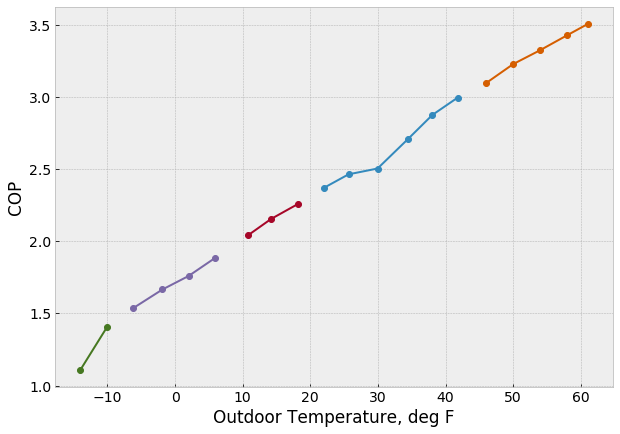

In [18]:
# Set up the multipliers for each of the segments.  Segment 1 will have
# a 1.0 multiplier and I will adjust the multipliers for the other segments
# to get good splices to the adjacent segment.
seg_mult = {
    1: 1.0,
    2: 1.02,
    3: 0.86,
    4: 0.80,
    5: 0.80,
}

for i in range(1, 6):
    dfp = vars()['df_seg%s' % i].copy()
    dfp['cop'] *= seg_mult[i]
    plot(dfp.temp, dfp.cop, linestyle='-', marker='o')
    xlabel('Outdoor Temperature, deg F')
    ylabel('COP')

In [19]:
# Find the weighted average HSPF of the main segment
df_hspf = dff[['hspf', 'source']].groupby('source').mean().reset_index()
df_hspf['weight'] = df_hspf['source'].map(study_weights)
df_hspf

,source,hspf,weight
0,CCHRC - Dillingham,10.00,1.0
1,CCHRC - Wrangell,12.00,0.5
2,Cadmus VT,11.91,3.0
3,"Seward, Kaluza w/ Remote Therm",13.40,1.0
4,Steven Winter,10.40,3.0


In [20]:
# Weighted Average HSPF
wtd_hspf = (df_hspf.hspf * df_hspf.weight).sum() / df_hspf.weight.sum()
wtd_hspf

11.332941176470593

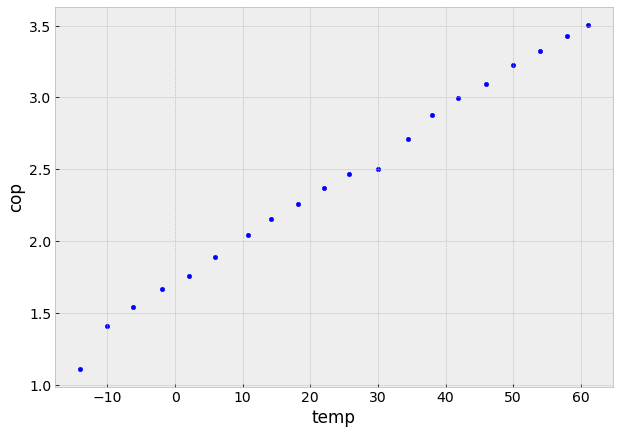

In [21]:
# Assemble a DataFrame with the points from the above curve.  Assemble in
# Temperature order.
order_df = (4, 3, 2, 1, 5)
df_points = None
for i in order_df:
    dfp = vars()['df_seg%s' % i].copy()
    dfp['cop'] *= seg_mult[i]
    if df_points is not None:
        df_points = pd.concat([df_points, dfp])
    else:
        df_points = dfp.copy()
    
df_points.plot.scatter(x='temp', y='cop')

In [22]:
# Print this out in a form that can be put into the calculator code
for r in df_points.itertuples():
    print(f'({r.temp:.1f}, {r.cop:.2f}),')

(-14.0, 1.11),
(-10.0, 1.41),
(-6.2, 1.54),
(-1.9, 1.67),
(2.0, 1.76),
(6.0, 1.89),
(10.8, 2.04),
(14.2, 2.15),
(18.1, 2.26),
(22.0, 2.37),
(25.7, 2.46),
(29.9, 2.50),
(34.5, 2.71),
(38.1, 2.88),
(41.8, 3.00),
(46.0, 3.10),
(50.0, 3.23),
(54.0, 3.32),
(58.0, 3.43),
(61.0, 3.51),


In [23]:
# I will add a -20 F point so that the full range of Heat Pump operation is 
# covered.  Extrapolating the above:
cop_minus_20 = 1.11 - (1.41 - 1.11)/4.0 * 6.0
cop_minus_20

0.6600000000000004

In [24]:
df_points

,temp,cop
temp_bin,,
-4.0,-14.000000,1.108058
-3.0,-10.000000,1.409403
-2.0,-6.157221,1.537505
-1.0,-1.852188,1.666237
0.0,2.006629,1.759564
1.0,5.964728,1.885904
2.0,10.783605,2.041269
3.0,14.200030,2.154719
4.0,18.147342,2.257801


## Incorporate the Final Points into the original DataFrame of Individual studies.

In [25]:
df_points_final = df_points.copy()
df_points_final.rename({'temp': 'temperature'}, axis=1, inplace=True)
df_points_final['source'] = 'FINAL'
df_points_final['field_study'] = True
df_points_final['hspf'] = 11.33
df_points_final

,temperature,cop,source,field_study,hspf
temp_bin,,,,,
-4.0,-14.000000,1.108058,FINAL,True,11.33
-3.0,-10.000000,1.409403,FINAL,True,11.33
-2.0,-6.157221,1.537505,FINAL,True,11.33
-1.0,-1.852188,1.666237,FINAL,True,11.33
0.0,2.006629,1.759564,FINAL,True,11.33
1.0,5.964728,1.885904,FINAL,True,11.33
2.0,10.783605,2.041269,FINAL,True,11.33
3.0,14.200030,2.154719,FINAL,True,11.33
4.0,18.147342,2.257801,FINAL,True,11.33


In [26]:
df_all = pd.concat([df.query('field_study == True'), df_points_final])
df_all['size'] =  1.0 
df_all.loc[df_all.source == 'FINAL', 'size'] = 4.0
df_all

,temperature,cop,source,field_study,hspf,size
3.0,10.982256,2.240202,"Seward, Kaluza w/ Remote Therm",True,13.40,1.0
4.0,13.280402,2.178560,"Seward, Kaluza w/ Remote Therm",True,13.40,1.0
5.0,16.581523,2.287307,"Seward, Kaluza w/ Remote Therm",True,13.40,1.0
6.0,19.299710,2.491674,"Seward, Kaluza w/ Remote Therm",True,13.40,1.0
7.0,22.281210,2.560221,"Seward, Kaluza w/ Remote Therm",True,13.40,1.0
8.0,25.728195,2.751083,"Seward, Kaluza w/ Remote Therm",True,13.40,1.0
9.0,28.091171,2.716664,"Seward, Kaluza w/ Remote Therm",True,13.40,1.0
10.0,30.448488,2.669988,"Seward, Kaluza w/ Remote Therm",True,13.40,1.0
11.0,34.994158,3.103082,"Seward, Kaluza w/ Remote Therm",True,13.40,1.0
12.0,37.643930,2.864387,"Seward, Kaluza w/ Remote Therm",True,13.40,1.0


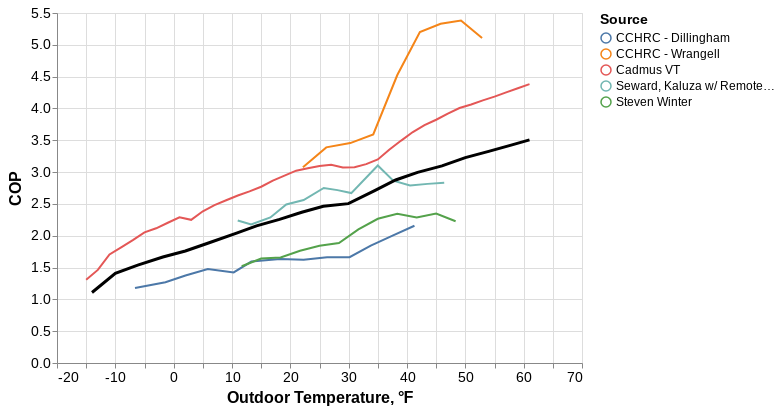

In [27]:
line1 = alt.Chart(df_all.query('source != "FINAL"')).mark_line().encode(
    x = 'temperature',
    y = 'cop',
    color = alt.Color('source:N', legend=alt.Legend(title="Source")),
)
line2 = alt.Chart(df_all.query('source == "FINAL"')).mark_line(strokeWidth=3, color='black').encode(
    x = alt.X('temperature', axis=alt.Axis(title='Outdoor Temperature, ℉')),
    y = alt.Y('cop', axis=alt.Axis(title='COP')),
)
line1 + line2

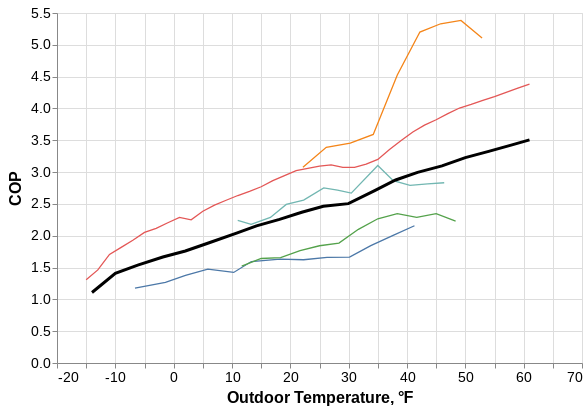

In [28]:
# Do this without a Legend so it can be marked up.
line1 = alt.Chart(df_all.query('source != "FINAL"')).mark_line(strokeWidth=1.3).encode(
    x = 'temperature',
    y = 'cop',
    color = alt.Color('source:N', legend=None),
)
line2 = alt.Chart(df_all.query('source == "FINAL"')).mark_line(strokeWidth=3, color='black').encode(
    x = alt.X('temperature', axis=alt.Axis(title='Outdoor Temperature, ℉')),
    y = alt.Y('cop', axis=alt.Axis(title='COP')),
)
cht = line1 + line2
cht.save('images/cop_vs_temp.png', scale_factor=1.5)
cht

### Kaluza Seward Heat Pump vs. Manufacturer Specs

In [30]:
df_kaluza = df_all.query('source == "Seward, Kaluza w/ Remote Therm"').copy()
df_kaluza

,temperature,cop,source,field_study,hspf,size
3.0,10.982256,2.240202,"Seward, Kaluza w/ Remote Therm",True,13.4,1.0
4.0,13.280402,2.178560,"Seward, Kaluza w/ Remote Therm",True,13.4,1.0
5.0,16.581523,2.287307,"Seward, Kaluza w/ Remote Therm",True,13.4,1.0
6.0,19.299710,2.491674,"Seward, Kaluza w/ Remote Therm",True,13.4,1.0
7.0,22.281210,2.560221,"Seward, Kaluza w/ Remote Therm",True,13.4,1.0
8.0,25.728195,2.751083,"Seward, Kaluza w/ Remote Therm",True,13.4,1.0
9.0,28.091171,2.716664,"Seward, Kaluza w/ Remote Therm",True,13.4,1.0
10.0,30.448488,2.669988,"Seward, Kaluza w/ Remote Therm",True,13.4,1.0
11.0,34.994158,3.103082,"Seward, Kaluza w/ Remote Therm",True,13.4,1.0
12.0,37.643930,2.864387,"Seward, Kaluza w/ Remote Therm",True,13.4,1.0


In [32]:
# COP from manuf. specs.  See "Dropbox/Heat_Pump/models/hp_model.ipynb"
# NOTE:  THIS INCLUDES a 5% reduction in the COP to account for defrost
# at temperatures below 37 deg F.
specs = [
    (10, 3.406),
    (11, 3.436),
    (12, 3.468),
    (13, 3.499),
    (14, 3.531),
    (15, 3.564),
    (16, 3.597),
    (17, 3.630),
    (18, 3.685),
    (19, 3.740),
    (20, 3.794),
    (21, 3.848),
    (22, 3.902),
    (23, 3.955),
    (24, 4.008),
    (25, 4.060),
    (26, 4.112),
    (27, 4.164),
    (28, 4.215),
    (29, 4.266),
    (30, 4.317),
    (31, 4.367),
    (32, 4.416),
    (33, 4.465),
    (34, 4.514),
    (35, 4.563),
    (36, 4.611),        # about 213 W input
]
temp, cop = list(zip(*specs))
df_specs = pd.DataFrame({'temperature': temp, 'cop': cop})
df_specs

,temperature,cop
0,10,3.406
1,11,3.436
2,12,3.468
3,13,3.499
4,14,3.531
5,15,3.564
6,16,3.597
7,17,3.630
8,18,3.685
9,19,3.740


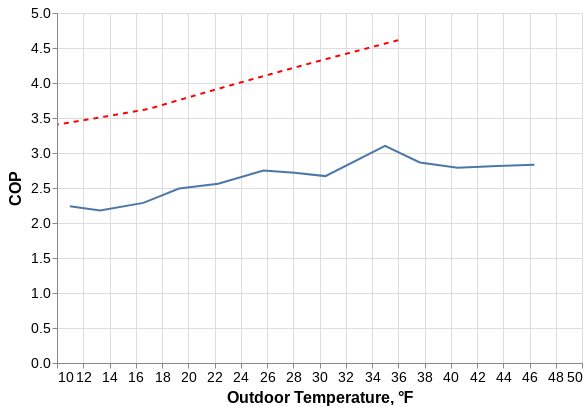

In [34]:
line1 = alt.Chart(df_kaluza).mark_line().encode(
    x = 'temperature',
    y = 'cop',
)
line2 = alt.Chart(df_specs).mark_line(strokeDash=[5,5], color='red').encode(
    x = alt.X('temperature', axis=alt.Axis(title='Outdoor Temperature, ℉')),
    y = alt.Y('cop', axis=alt.Axis(title='COP')),
)
cht = line1 + line2
cht.save('images/kaluza_vs_specs.png', scale_factor=1.5)
cht